# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
url = f"{base_url}appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | olgii
City not found. Skipping...
Processing Record 3 of Set 1 | mezhdurechenskiy
Processing Record 4 of Set 1 | awjilah
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | kumylzhenskaya
Processing Record 14 of Set 1 | mount pearl
Processing Record 15 of Set 1 | yatou
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | sumbe
Processing Record 21 of Set 1 | qaqortoq

Processing Record 38 of Set 4 | kailua-kona
Processing Record 39 of Set 4 | yonggwang-up
Processing Record 40 of Set 4 | yelizovo
Processing Record 41 of Set 4 | red bluff
Processing Record 42 of Set 4 | santa ana
Processing Record 43 of Set 4 | colares
Processing Record 44 of Set 4 | avrig
Processing Record 45 of Set 4 | berbera
Processing Record 46 of Set 4 | ujae
Processing Record 47 of Set 4 | posto da mata
City not found. Skipping...
Processing Record 48 of Set 4 | verdal
Processing Record 49 of Set 4 | at-bashi
Processing Record 0 of Set 5 | am timan
Processing Record 1 of Set 5 | salto
Processing Record 2 of Set 5 | port alfred
Processing Record 3 of Set 5 | amga
Processing Record 4 of Set 5 | minas
Processing Record 5 of Set 5 | vilyuchinsk
Processing Record 6 of Set 5 | ouani
Processing Record 7 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 8 of Set 5 | byron bay
Processing Record 9 of Set 5 | east ballina
Processing Record 10 of Set 5 | hlybokaye
Processing

Processing Record 28 of Set 8 | yangor
City not found. Skipping...
Processing Record 29 of Set 8 | aral
Processing Record 30 of Set 8 | kodinsk
Processing Record 31 of Set 8 | el calafate
Processing Record 32 of Set 8 | weno
Processing Record 33 of Set 8 | vila franca do campo
Processing Record 34 of Set 8 | babu
Processing Record 35 of Set 8 | westport
Processing Record 36 of Set 8 | okha
Processing Record 37 of Set 8 | ancud
Processing Record 38 of Set 8 | ca mau
Processing Record 39 of Set 8 | punta cana
Processing Record 40 of Set 8 | nogliki
Processing Record 41 of Set 8 | morehead
Processing Record 42 of Set 8 | semenov
Processing Record 43 of Set 8 | severo-yeniseyskiy
Processing Record 44 of Set 8 | carutapera
Processing Record 45 of Set 8 | yeed
Processing Record 46 of Set 8 | yuzhno-kurilsk
Processing Record 47 of Set 8 | saguenay
Processing Record 48 of Set 8 | mil'kovo
Processing Record 49 of Set 8 | outjo
Processing Record 0 of Set 9 | ruwa
Processing Record 1 of Set 9 | s

Processing Record 21 of Set 12 | zywiec
Processing Record 22 of Set 12 | jiwani
Processing Record 23 of Set 12 | al bardiyah
Processing Record 24 of Set 12 | monte argentario
Processing Record 25 of Set 12 | sisimiut
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [9]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,4.81,75,40,13.38,AR,1686611199
1,mezhdurechenskiy,59.6000,65.9333,4.52,67,10,2.64,RU,1686611199
2,awjilah,29.1081,21.2869,25.47,49,0,8.46,LY,1686611001
3,invercargill,-46.4000,168.3500,10.27,90,98,2.19,NZ,1686611199
4,puerto natales,-51.7236,-72.4875,1.69,94,97,2.30,CL,1686611199
5,tiksi,71.6872,128.8694,1.90,92,78,0.68,RU,1686611200
6,klyuchi,52.2667,79.1667,15.32,82,77,4.32,RU,1686611200
7,port-aux-francais,-49.3500,70.2167,6.31,91,100,14.08,TF,1686611200
8,adamstown,-25.0660,-130.1015,20.04,65,17,3.40,PN,1686611200
9,grytviken,-54.2811,-36.5092,-1.81,94,78,2.52,GS,1686611200


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,4.81,75,40,13.38,AR,1686611199
1,mezhdurechenskiy,59.6000,65.9333,4.52,67,10,2.64,RU,1686611199
2,awjilah,29.1081,21.2869,25.47,49,0,8.46,LY,1686611001
3,invercargill,-46.4000,168.3500,10.27,90,98,2.19,NZ,1686611199
4,puerto natales,-51.7236,-72.4875,1.69,94,97,2.30,CL,1686611199
5,tiksi,71.6872,128.8694,1.90,92,78,0.68,RU,1686611200
6,klyuchi,52.2667,79.1667,15.32,82,77,4.32,RU,1686611200
7,port-aux-francais,-49.3500,70.2167,6.31,91,100,14.08,TF,1686611200
8,adamstown,-25.0660,-130.1015,20.04,65,17,3.40,PN,1686611200


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

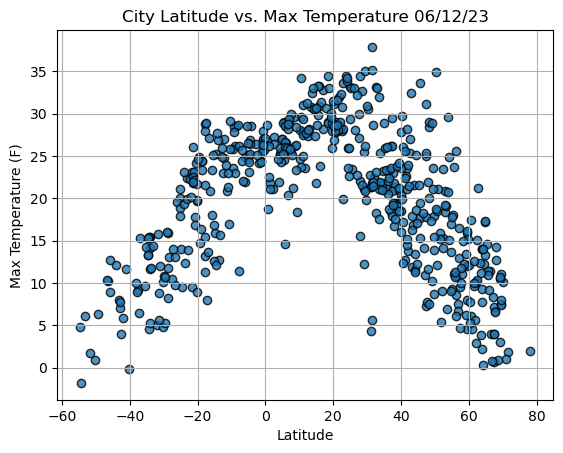

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

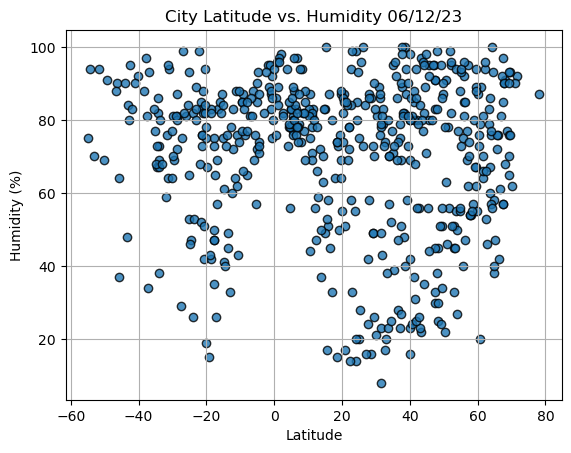

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

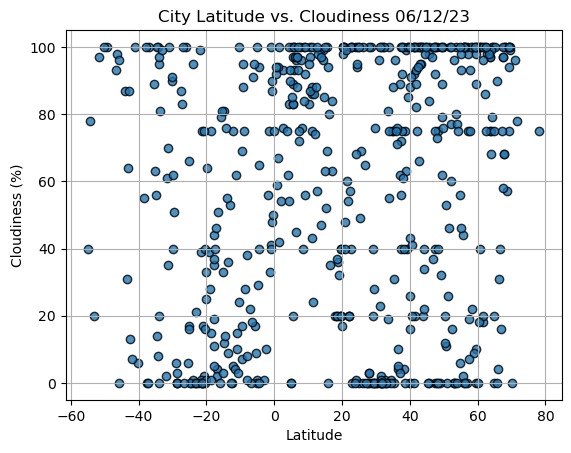

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

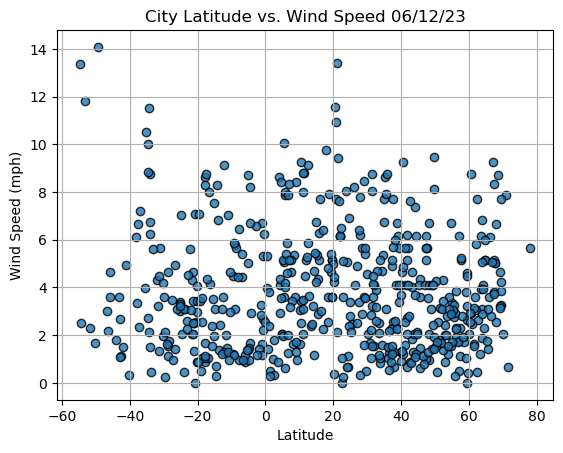

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordindates):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    print(f'The r-squared is: {round(r_value**2, 6)}')
    
    plt.annotate(line_eq, text_coordindates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mezhdurechenskiy,59.6000,65.9333,4.52,67,10,2.64,RU,1686611199
2,awjilah,29.1081,21.2869,25.47,49,0,8.46,LY,1686611001
5,tiksi,71.6872,128.8694,1.90,92,78,0.68,RU,1686611200
6,klyuchi,52.2667,79.1667,15.32,82,77,4.32,RU,1686611200
10,jamestown,42.0970,-79.2353,13.77,80,100,5.66,US,1686611002


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,4.81,75,40,13.38,AR,1686611199
3,invercargill,-46.4000,168.3500,10.27,90,98,2.19,NZ,1686611199
4,puerto natales,-51.7236,-72.4875,1.69,94,97,2.30,CL,1686611199
7,port-aux-francais,-49.3500,70.2167,6.31,91,100,14.08,TF,1686611200
8,adamstown,-25.0660,-130.1015,20.04,65,17,3.40,PN,1686611200


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.548226


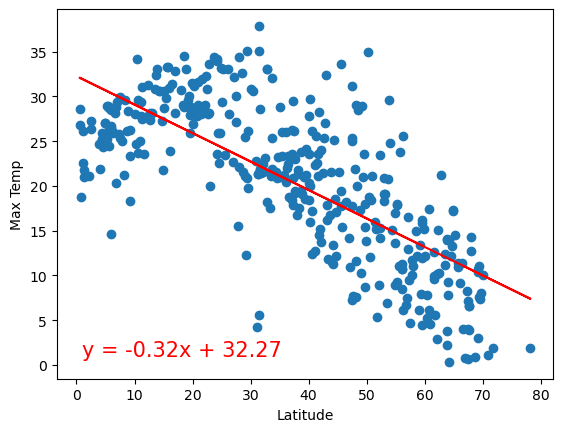

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", "Max Temp", (1,1))

The r-squared is: 0.663262


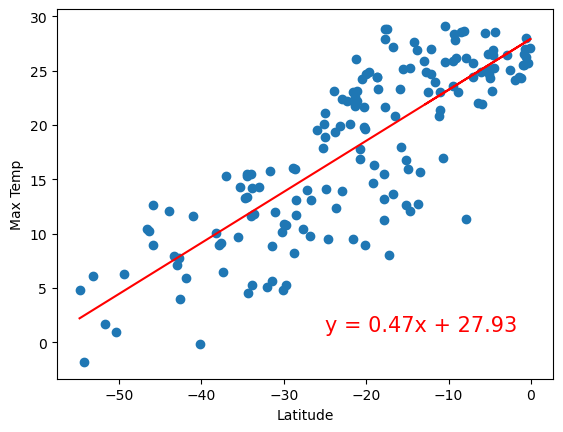

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", "Max Temp", (-25,1))

**Discussion about the linear relationship:** These models show the simple linear relationships between latitude of each hemisphere and max temperature, each dot representing a city (roughly). Between the two, it implies that, as latitude approaches 0, max temp goes up, more so by the southern results than the northern. This could imply there is a wider range of values that one must approach to reach max temp across the whole dataset.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.002925


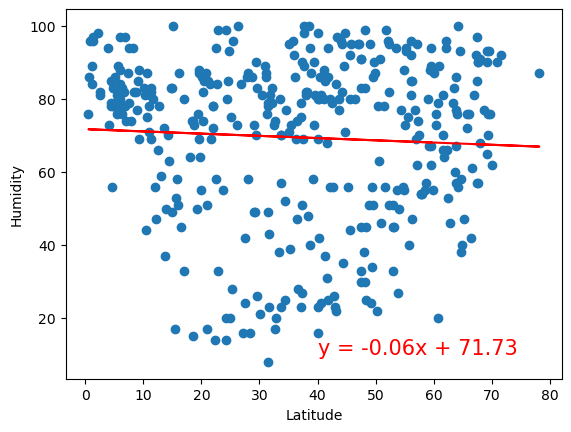

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Humidity", "Humidity", (40,10))

The r-squared is: 0.000135


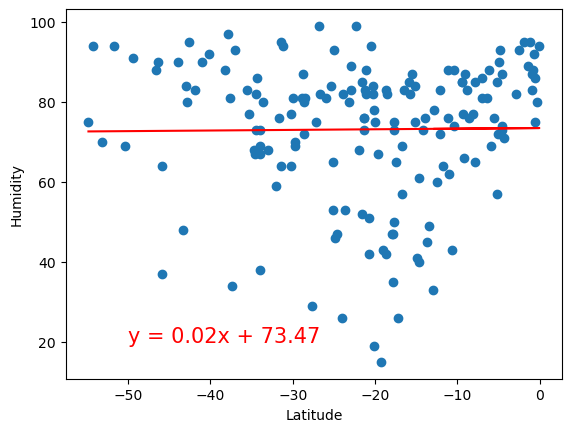

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Humidity", "Humidity", (-50,20))

**Discussion about the linear relationship:** These models show the simple linear relationships between latitude of each hemisphere and humidity, each dot representing a city (roughly). There seems to be no sort of trend or correlation between humidity and temperature, suggesting this is something not fit for regression. It does suggest that the majority of cities seems to have a humidity greater than 60%

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.000604


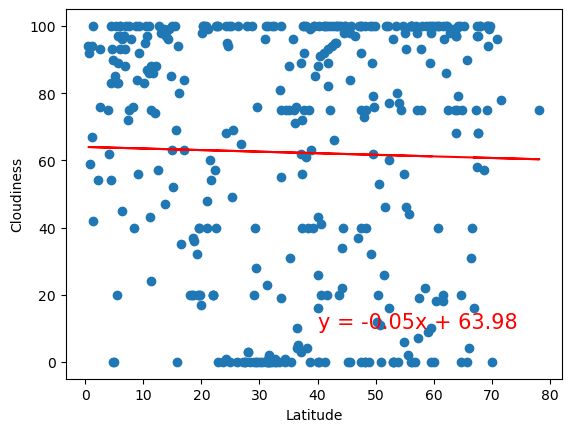

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Cloudiness", "Cloudiness", (40,10))

The r-squared is: 0.030369


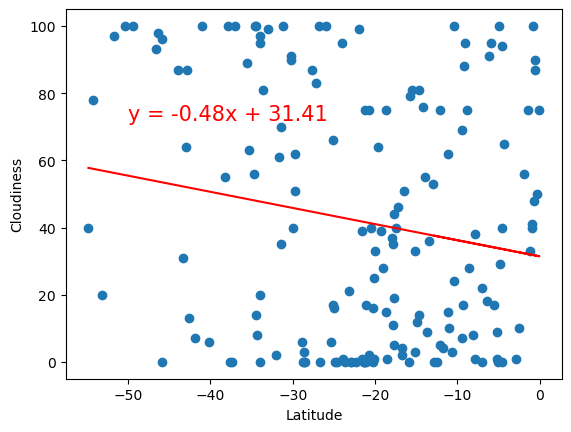

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Cloudiness", "Cloudiness", (-50,72))

**Discussion about the linear relationship:** These models show the simple linear relationships between latitude of each hemisphere and cloudiness, each dot representing a city (roughly). Like humidity, there is a lack of correlation present between these two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.016887


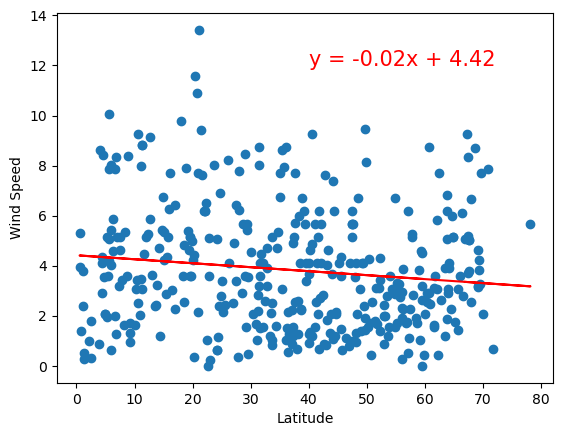

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Wind Speed", "Wind Speed", (40,12))

The r-squared is: 0.02776


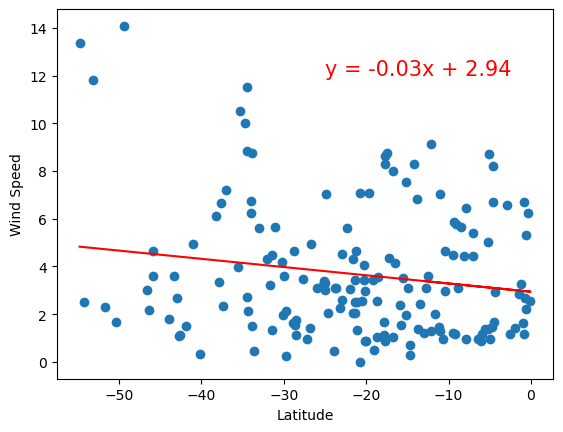

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Wind Speed", "Wind Speed", (-25,12))

**Discussion about the linear relationship:** These models show the simple linear relationships between latitude of each hemisphere and Wind Speed, each dot representing a city (roughly). Like humidity and cloudiness, there is a lack of correlation present between these two variables.

Across all these three variables, latitude was not something to compare with.